# 模型部署基本概念

训练框架、中间格式和推理框架之间的关系

对于常用的一些训练框架，当仅使用这些框架进行推理时，各部分的关系可以标识如下：

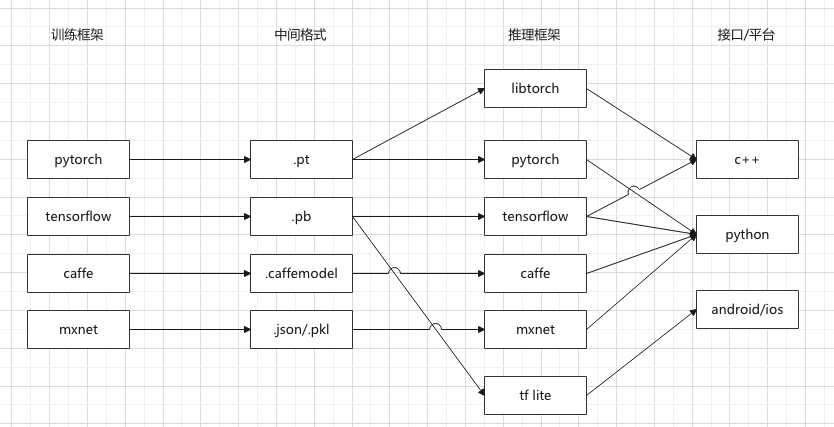

但是上面这种用什么框架来训练就用什么框架来推理的方式，要求将模型转换为多种格式，在实际部署的时候比较麻烦，所以就有些共用的中间格式。此外，为了加速在不同平台和硬件上的推理速度，会有一些专门的推理框架：

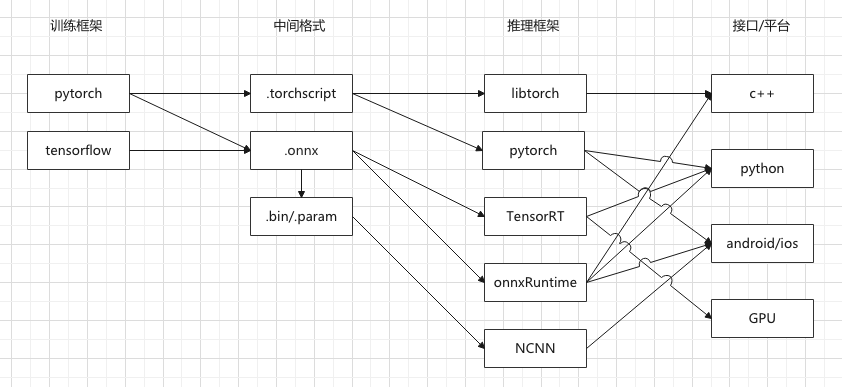

以pytorch为例，通常在GPU上训练模型，再根据不同的需求将模型转化为其他格式：
+ 在CPU/GPU服务器上部署，对性能要求不是很高，可以直接将模型保存为.pt格式，然后直接用pytorch框架推理
+ 在CPU/GPU服务器上部署，但是业务场景为高并发场景，对性能和稳定性要求很高，可以转换为.onnx格式，然后TensorRT或者OnnxRuntime推理
+ 在安卓手机端上部署，可以先将模型转换为onnx格式，再转换为.bin/.param格式在NCNN上推理
+ 假设需要在C++上推理，可以将模型转换为.pt或者.torchscript格式，使用libtorch推理

## 其他概念：框架

【Caffe】
是一个深度学习框架，可以用来训练和部署。由C++语言编写，提供MATLAB和pyhton接口，速度快。某些特定硬件部署 (如海思、国产硬件 或 其他一些低算力硬件)，这些 "自研推理框架" 大多会 优先 支持 caffe 模型的导入。
输出的模型文件格式为.caffemodel，特别的网络结构另存为.prototxt格式；.caffemodel其实就是二进制的protobuf格式。


【onnx】
全称开放神经网络交换（Open Neural Network Exchange），是一种中间格式，由微软和Facebook提出。


【NCNN】
android端支持的深度学习框架，支持的模型文件格式为.bin或者.param。在Android端利用NCNN部署ONNX格式模型，那么就需要将ONNX利用NCNN的转换工具转换到NCNN所支持的bin和param格式。


【torchscript】
是pytorch的中间表示形式，可以用C++加载和运行。torch.onnx.export其实是用了torchscript的trace方式，通过一次推理的方式将.pt转换为torchscript，然后再转换为onnx格式。


【TensorRT】
Nvidia出品，是一个在GPU上高性能推理的C++框架


【OnnxRuntime】
微软出品的推理框架，支持onnx格式模型


【OpenVINO】
intel出品的工具套件，用于快速部署应用和解决方案，兼容各种开源框架训练的模型

## 其他概念：芯片

* TPU：针对不同需求的定制芯片，google出品用于加速tf
* NPU：neural，模拟人类神经元和突出结构；比如寒武纪、IBM的TrueNorth芯片
* BPU：地平线出品的嵌入式芯片，多用于自动驾驶
* DPU：deeplearning，FPGA芯片
* HPU：holographics，全息芯片，微软出品

## 参考

+ https://zhuanlan.zhihu.com/p/357233976